In [2]:
import os
import re
from tqdm import tqdm
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import LabelEncoder


%matplotlib inline

#### Load dataset 1

In [3]:

train_df = pd.read_csv('data/dialect_dataset_preprocessed.csv')
train_df.dropna(inplace=True)
train_df.drop_duplicates(inplace=True)

df=pd.DataFrame(columns=['text2','dialect'])
for i in np.unique(train_df['dialect']):
    temp=train_df.loc[train_df['dialect']==i].iloc[:]
    print(temp.shape)
    df=df.append(temp,ignore_index=True)



from sklearn.model_selection import train_test_split
X = df.text2.values
y = df.dialect.values

enc=LabelEncoder()
y=enc.fit_transform(y)


# The train val split is used by the DL approach but not classical ML
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=2022,stratify=y)



(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(9224, 4)
(9905, 4)


In [4]:
# !pip install ar_wordcloud
# !pip install arabic-reshaper
# text=df['text2'].values
# text=''.join(text)
# from ar_wordcloud import ArabicWordCloud
# awc = ArabicWordCloud(background_color="white")

# wc = awc.from_text(text)
# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [5]:
# !pip install arabic-reshaper
# from bidi.algorithm import get_display   # pip install python-bidi
# from arabic_reshaper import reshape      # pip install arabic-reshaper

# rtl = lambda w: get_display(reshape(f'{w}'))
# stop =[rtl(i) for i in list(wc.words_.keys())]
# stop

<a id="1"></a>
# Classical ML approach
#### Using tf-idf features

In [72]:
# Helper functions 
countries=np.array(['United Arab Emirates','Bahrain','Algeria','Egypt','Iraq','Jordan','Kuwait','Lebanon','Libya','Morocco','Oman','Palestine','Qatar','Saudi Arabia','Sudan','Syrian','Tunisia','Yemen'])

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
import seaborn as sns

def train_model(model, data, targets):
    text_clf = Pipeline([
    ('vect', CountVectorizer(analyzer='char_wb',ngram_range=(2,5))),
    ('tfidf', TfidfTransformer()),
    ('clf', model),
    ])
    text_clf.fit(data, targets)
    return text_clf
def get_accuracy(trained_model,X, y):
    predicted = trained_model.predict(X)
    accuracy = np.mean(predicted == y)
    return accuracy
def get_report(trained_model,X, y):
    plt.figure(figsize=(20,20))
    predicted = trained_model.predict(X)
    cr = classification_report(y,predicted,target_names=countries)
    cm=confusion_matrix(y,predicted)
    df_cm=pd.DataFrame(cm,index=countries)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g') # font size
    plt.show()
    print(cr)


<a id="1.1"></a>
### Compare classifiers

## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
trained_clf_LogisticRegression = train_model(LogisticRegression(), X_train, y_train)
accuracy = get_accuracy(trained_clf_LogisticRegression,X_test, y_test)
print(f"Test dataset accuracy with LogisticRegression: {accuracy:.2f}")

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Test dataset accuracy with LogisticRegression: 0.49


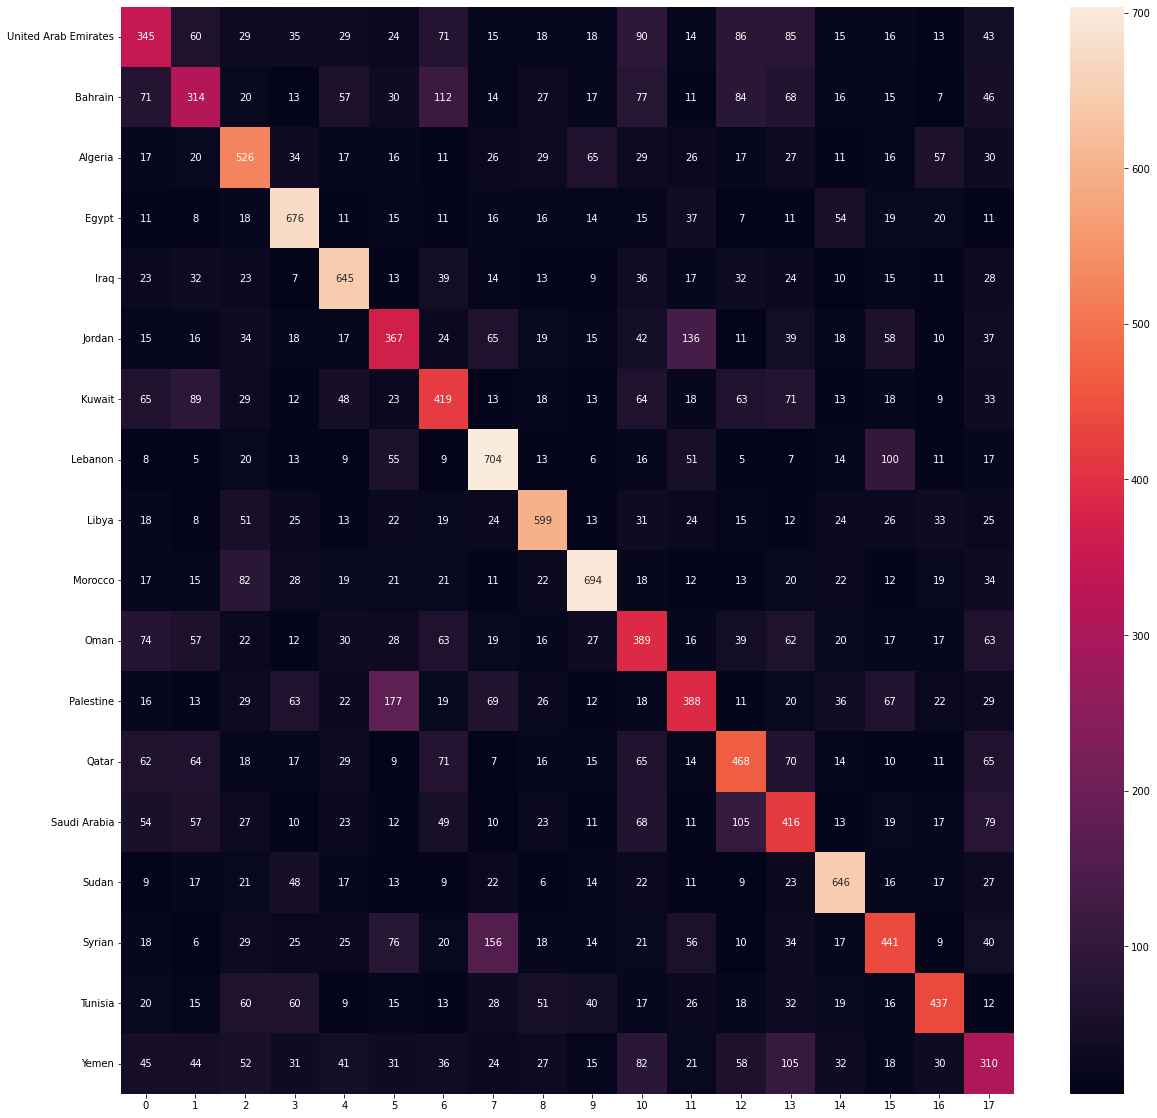

                      precision    recall  f1-score   support

United Arab Emirates       0.39      0.34      0.36      1006
             Bahrain       0.37      0.31      0.34       999
             Algeria       0.48      0.54      0.51       974
               Egypt       0.60      0.70      0.64       970
                Iraq       0.61      0.65      0.63       991
              Jordan       0.39      0.39      0.39       941
              Kuwait       0.41      0.41      0.41      1018
             Lebanon       0.57      0.66      0.61      1063
               Libya       0.63      0.61      0.62       982
             Morocco       0.69      0.64      0.66      1080
                Oman       0.35      0.40      0.38       971
           Palestine       0.44      0.37      0.40      1037
               Qatar       0.45      0.46      0.45      1025
        Saudi Arabia       0.37      0.41      0.39      1004
               Sudan       0.65      0.68      0.67       947
       

In [73]:
get_report(trained_clf_LogisticRegression,X_test, y_test)

## MultinomialNB

In [13]:
from sklearn.naive_bayes import MultinomialNB
trained_clf_multinomial_nb = train_model(MultinomialNB(), X_train, y_train)
accuracy = get_accuracy(trained_clf_multinomial_nb,X_test, y_test)
print(f"Test dataset accuracy with MultinomialNB: {accuracy:.2f}")

Test dataset accuracy with MultinomialNB: 0.46


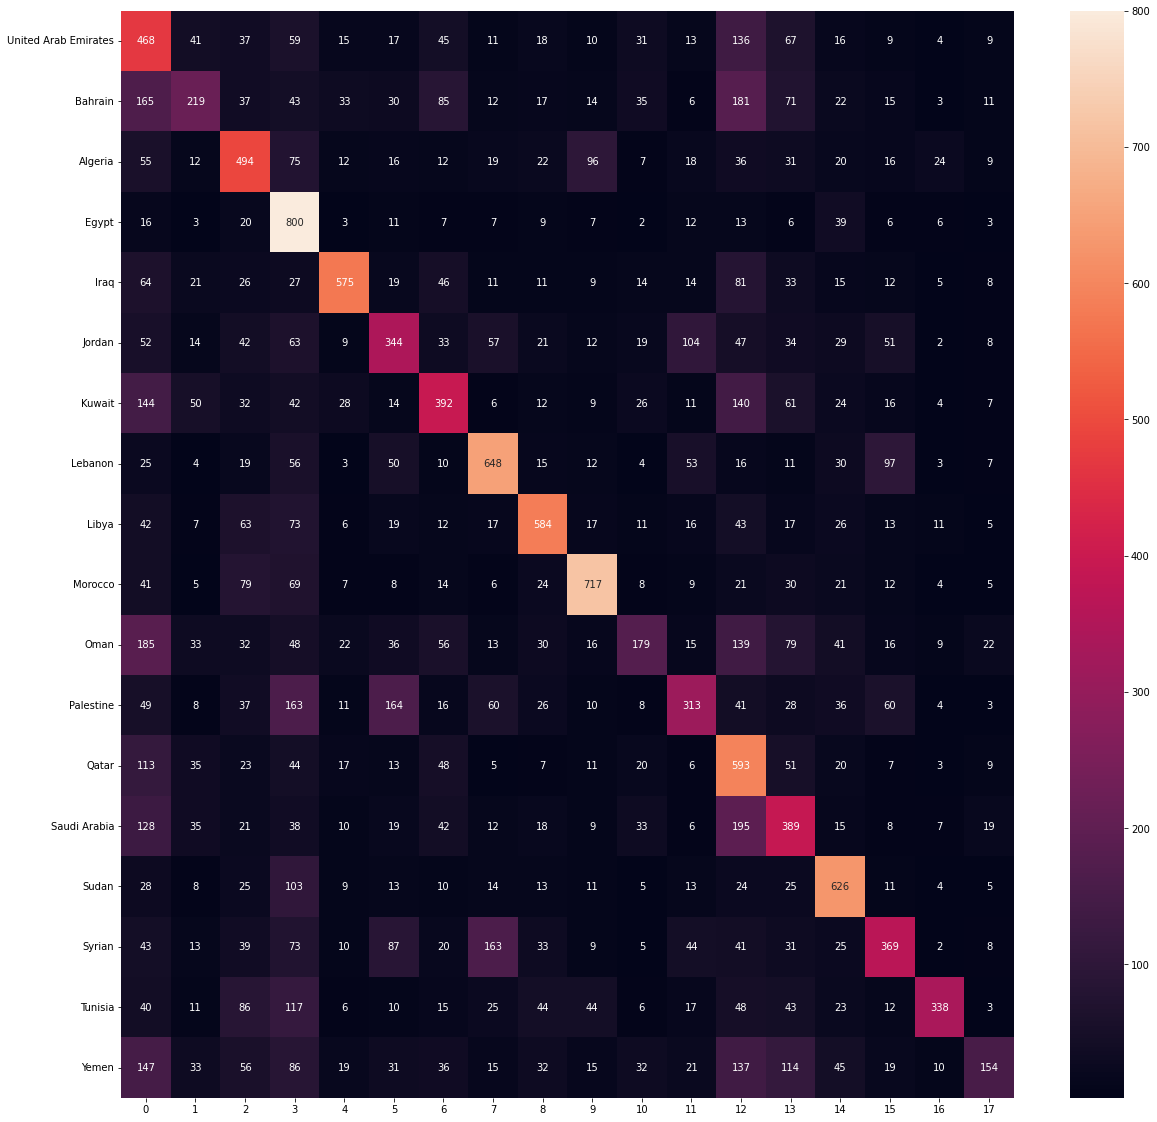

                      precision    recall  f1-score   support

United Arab Emirates       0.26      0.47      0.33      1006
             Bahrain       0.40      0.22      0.28       999
             Algeria       0.42      0.51      0.46       974
               Egypt       0.40      0.82      0.54       970
                Iraq       0.72      0.58      0.64       991
              Jordan       0.38      0.37      0.37       941
              Kuwait       0.44      0.39      0.41      1018
             Lebanon       0.59      0.61      0.60      1063
               Libya       0.62      0.59      0.61       982
             Morocco       0.70      0.66      0.68      1080
                Oman       0.40      0.18      0.25       971
           Palestine       0.45      0.30      0.36      1037
               Qatar       0.31      0.58      0.40      1025
        Saudi Arabia       0.35      0.39      0.37      1004
               Sudan       0.58      0.66      0.62       947
       

In [74]:
get_report(trained_clf_multinomial_nb,X_test, y_test)

## Linear SVC

In [15]:
from sklearn.svm import LinearSVC
trained_clf_linearSVC = train_model(LinearSVC(), X_train, y_train)
accuracy = get_accuracy(trained_clf_linearSVC,X_test, y_test)
print(f"Test dataset accuracy with LinearSVC: {accuracy:.2f}")

Test dataset accuracy with LinearSVC: 0.51


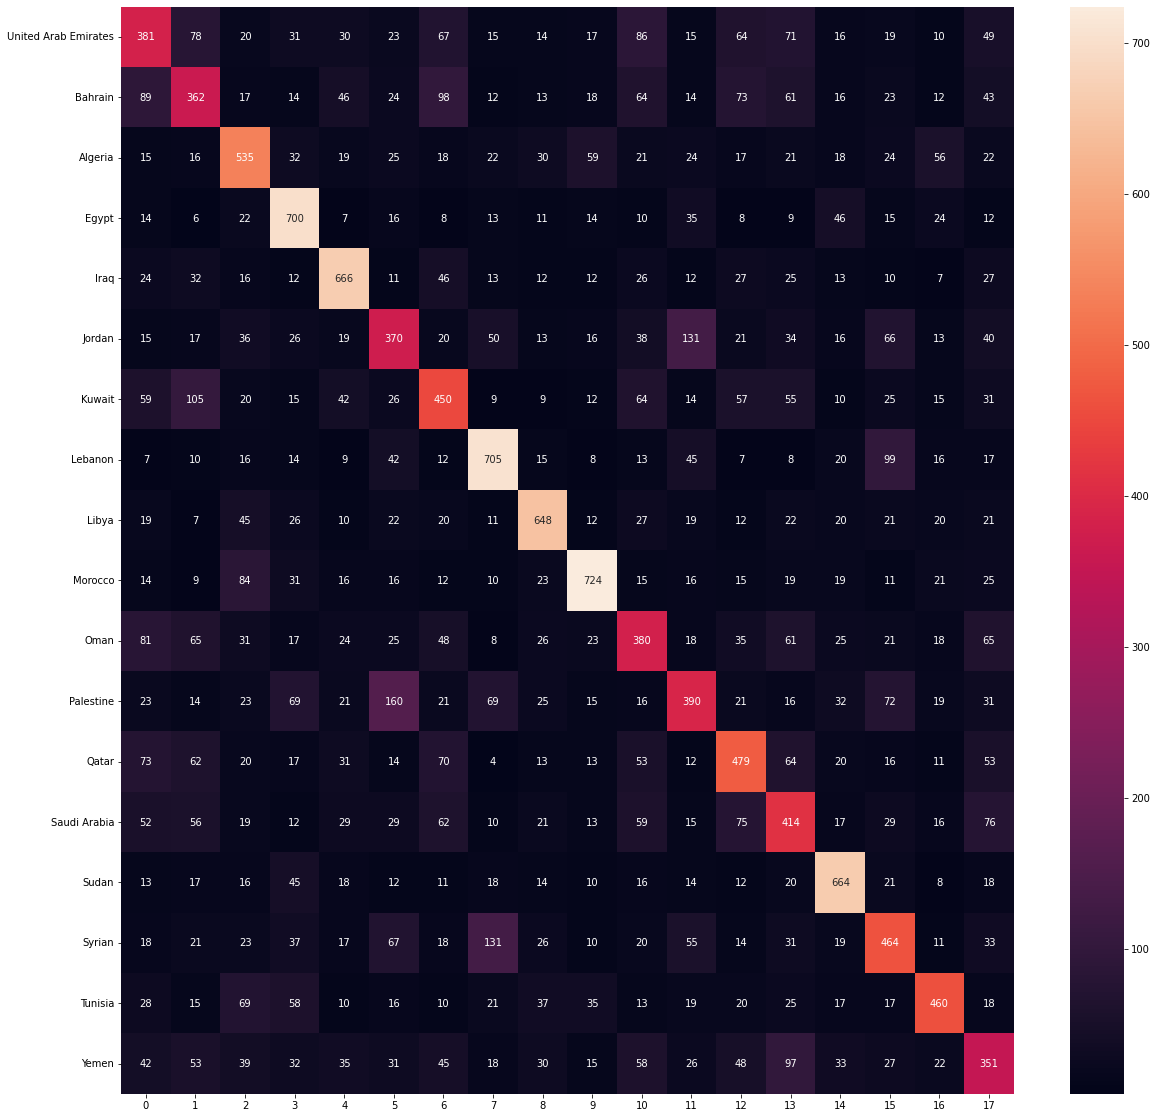

                      precision    recall  f1-score   support

United Arab Emirates       0.39      0.38      0.39      1006
             Bahrain       0.38      0.36      0.37       999
             Algeria       0.51      0.55      0.53       974
               Egypt       0.59      0.72      0.65       970
                Iraq       0.63      0.67      0.65       991
              Jordan       0.40      0.39      0.40       941
              Kuwait       0.43      0.44      0.44      1018
             Lebanon       0.62      0.66      0.64      1063
               Libya       0.66      0.66      0.66       982
             Morocco       0.71      0.67      0.69      1080
                Oman       0.39      0.39      0.39       971
           Palestine       0.45      0.38      0.41      1037
               Qatar       0.48      0.47      0.47      1025
        Saudi Arabia       0.39      0.41      0.40      1004
               Sudan       0.65      0.70      0.67       947
       

In [75]:
get_report(trained_clf_linearSVC,X_test, y_test)

## Stochastic Gradient Descent

In [17]:
from sklearn.linear_model import SGDClassifier
trained_clf_SGDClassifier = train_model(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None), X_train, y_train)
accuracy = get_accuracy(trained_clf_SGDClassifier,X_test, y_test)
print(f"Test dataset accuracy with SGDClassifier: {accuracy:.2f}")

Test dataset accuracy with SGDClassifier: 0.47


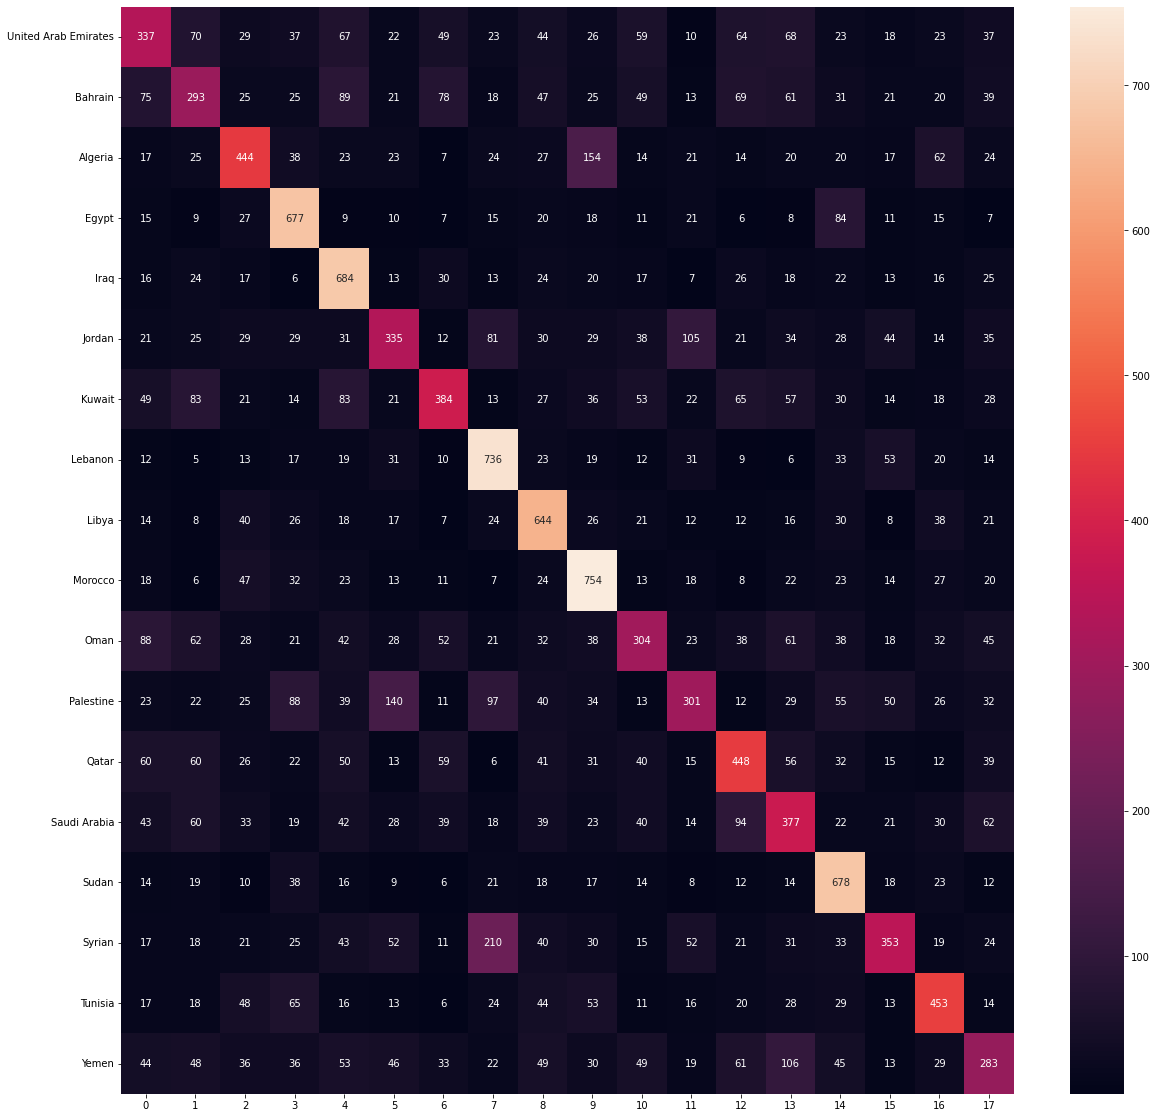

                      precision    recall  f1-score   support

United Arab Emirates       0.38      0.33      0.36      1006
             Bahrain       0.34      0.29      0.32       999
             Algeria       0.48      0.46      0.47       974
               Egypt       0.56      0.70      0.62       970
                Iraq       0.51      0.69      0.59       991
              Jordan       0.40      0.36      0.38       941
              Kuwait       0.47      0.38      0.42      1018
             Lebanon       0.54      0.69      0.60      1063
               Libya       0.53      0.66      0.59       982
             Morocco       0.55      0.70      0.62      1080
                Oman       0.39      0.31      0.35       971
           Palestine       0.43      0.29      0.34      1037
               Qatar       0.45      0.44      0.44      1025
        Saudi Arabia       0.37      0.38      0.37      1004
               Sudan       0.54      0.72      0.62       947
       

In [76]:
get_report(trained_clf_SGDClassifier,X_test, y_test)

## Multi Layer Perceptron

In [19]:
from sklearn.neural_network import MLPClassifier
trained_clf_MLPClassifier = train_model(MLPClassifier(verbose=1,max_iter=3,validation_fraction=0.1), X_train, y_train)
accuracy = get_accuracy(trained_clf_MLPClassifier,X_test, y_test)
print(f"Test dataset accuracy with MLPClassifier: {accuracy:.2f}")

Iteration 1, loss = 2.00187872
Iteration 2, loss = 1.14032745
Iteration 3, loss = 0.74523576


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Test dataset accuracy with MLPClassifier: 0.51


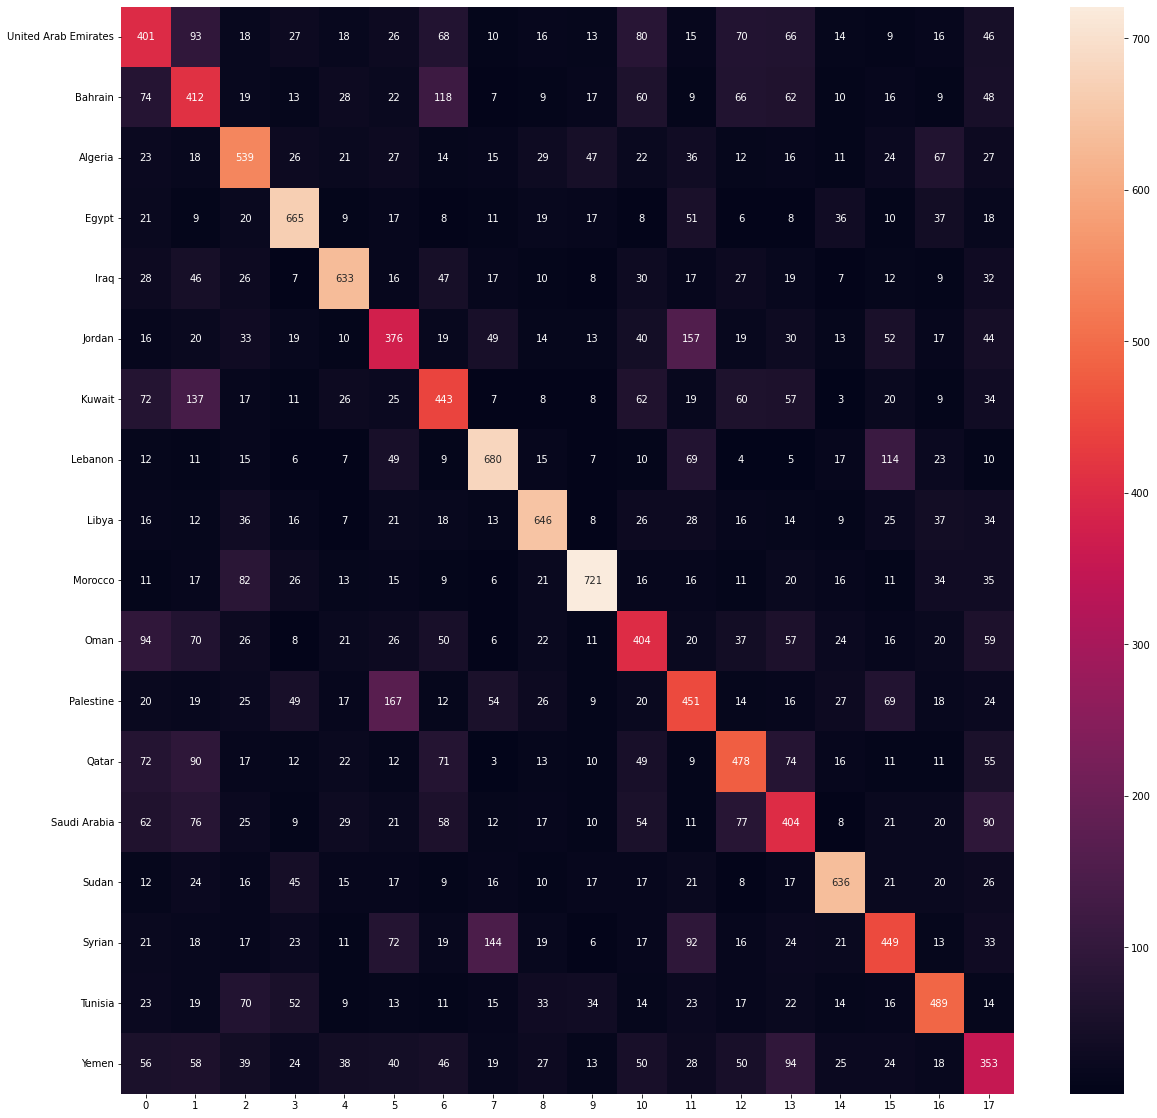

                      precision    recall  f1-score   support

United Arab Emirates       0.39      0.40      0.39      1006
             Bahrain       0.36      0.41      0.38       999
             Algeria       0.52      0.55      0.54       974
               Egypt       0.64      0.69      0.66       970
                Iraq       0.68      0.64      0.66       991
              Jordan       0.39      0.40      0.40       941
              Kuwait       0.43      0.44      0.43      1018
             Lebanon       0.63      0.64      0.63      1063
               Libya       0.68      0.66      0.67       982
             Morocco       0.74      0.67      0.70      1080
                Oman       0.41      0.42      0.41       971
           Palestine       0.42      0.43      0.43      1037
               Qatar       0.48      0.47      0.47      1025
        Saudi Arabia       0.40      0.40      0.40      1004
               Sudan       0.70      0.67      0.69       947
       

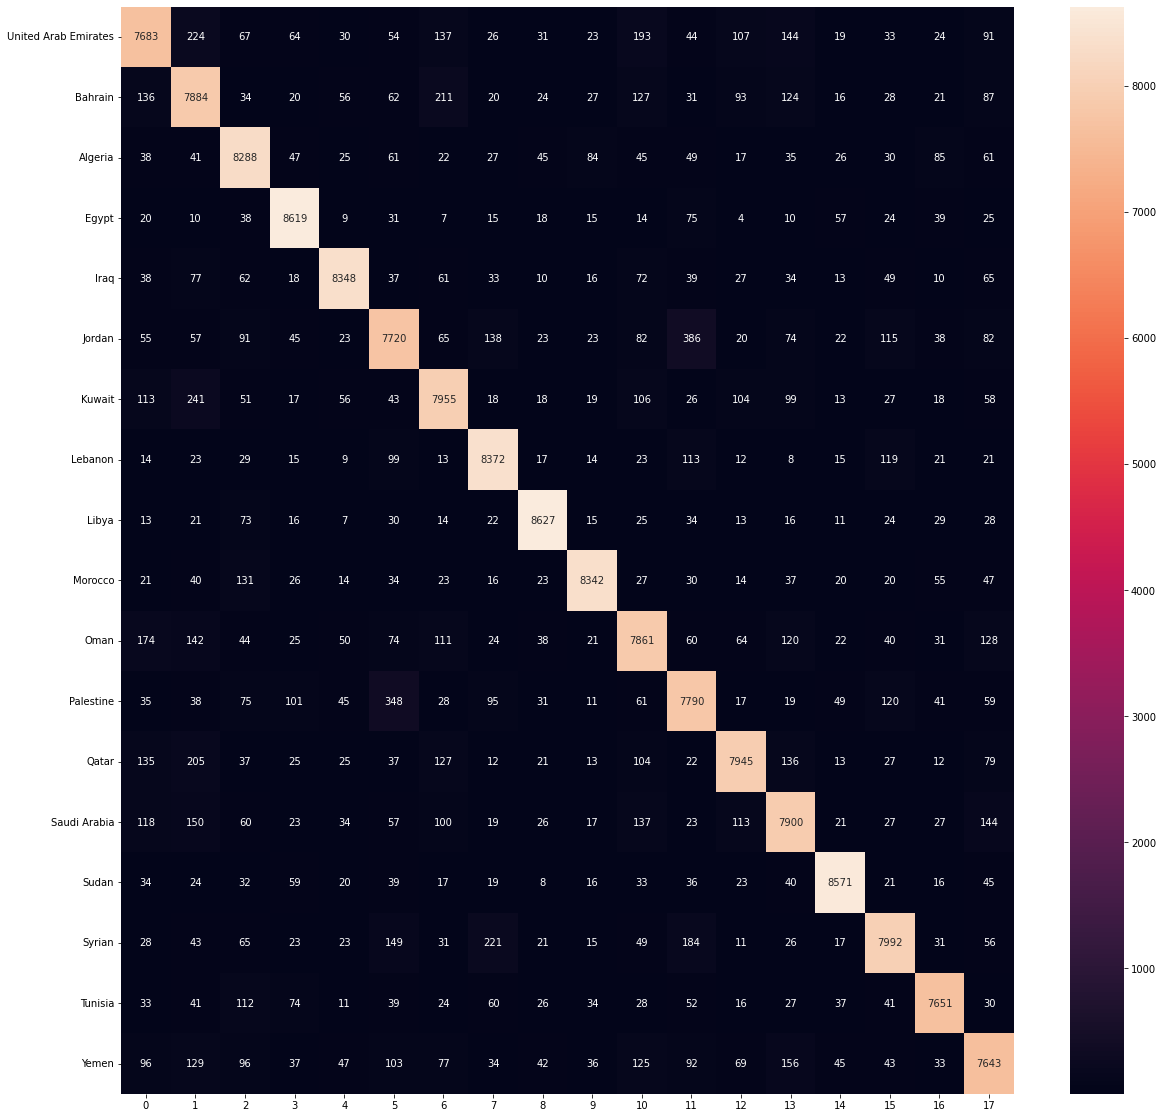

                      precision    recall  f1-score   support

United Arab Emirates       0.87      0.85      0.86      8994
             Bahrain       0.84      0.88      0.86      9001
             Algeria       0.88      0.92      0.90      9026
               Egypt       0.93      0.95      0.94      9030
                Iraq       0.95      0.93      0.94      9009
              Jordan       0.86      0.85      0.85      9059
              Kuwait       0.88      0.89      0.88      8982
             Lebanon       0.91      0.94      0.92      8937
               Libya       0.95      0.96      0.96      9018
             Morocco       0.95      0.94      0.94      8920
                Oman       0.86      0.87      0.87      9029
           Palestine       0.86      0.87      0.86      8963
               Qatar       0.92      0.89      0.90      8975
        Saudi Arabia       0.88      0.88      0.88      8996
               Sudan       0.95      0.95      0.95      9053
       

In [77]:
get_report(trained_clf_MLPClassifier,X_test, y_test)
get_report(trained_clf_MLPClassifier,X_train, y_train)

## OneVsOneClassifier using Linear SVM

In [25]:
from sklearn.multiclass import OneVsOneClassifier
trained_clf_OneVsOneClassifier = train_model(OneVsOneClassifier(LinearSVC()), X_train, y_train)
accuracy = get_accuracy(trained_clf_OneVsOneClassifier,X_test, y_test)
print(f"Test dataset accuracy with trained_clf_OneVsOneClassifier: {accuracy:.2f}")


Test dataset accuracy with trained_clf_OneVsOneClassifier: 0.49


In [ ]:
get_report(trained_clf_OneVsOneClassifier,X_test, y_test)

#### Save Models

In [22]:
from joblib import dump, load

dump(trained_clf_MLPClassifier, 'MLP.joblib') 
dump(trained_clf_linearSVC, 'SVMClassifier.joblib') 
dump(trained_clf_multinomial_nb, 'multinomial_Classifier.joblib')


['multinomial_Classifier.joblib']